# 1: Objectives & Data Exploration
OBJECTIVES - BUSINESS UNDERSTANDING

TARGET VARIABLE: Attrition (Binary Classification)
- 0 = Employee Retained
- 1 = Employee Left Company

BUSINESS CONTEXT:
Problem: High employee turnover costs companies 200% of annual salary per employee
Goal: Predict which employees will leave before they resign
Benefits: 
  - Proactive retention strategies
  - Reduce recruitment and training costs
  - Improve workforce planning and stability

KEY QUESTIONS:
1. What factors most influence employee churn?
2. Which employees are at high risk of leaving?
3. How accurately can we predict attrition?
4. What actionable insights can improve retention?


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [4]:
# loading the dataset to read from the relative path
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
# Dataset Overview
print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")

print("\n" + "="*70)
print("FIRST 5 ROWS")
print("="*70)
print(df.head())

print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(df.info())

print("\n" + "="*70)
print("TARGET VARIABLE DISTRIBUTION")
print("="*70)
print("\nAttrition Counts:")
print(df['Attrition'].value_counts())
print("\nAttrition Percentage:")
print(df['Attrition'].value_counts(normalize=True) * 100)

DATASET OVERVIEW

Dataset Shape: (1470, 35)
Total Records: 1470
Total Features: 35

FIRST 5 ROWS
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical             

# DATA EXPLORATION - DATA UNDERSTANDING & PREPARATION

In [6]:
# Check Missing Values
print("\nMISSING VALUES:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found! ✓")
else:
    print(missing[missing > 0])

# Statistical Summary
print("\n" + "="*70)
print("STATISTICAL SUMMARY")
print("="*70)
print(df.describe())

# Identify Categorical and Numerical Columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical Columns ({len(categorical_cols)}):")
print(categorical_cols)
print(f"\nNumerical Columns ({len(numerical_cols)}):")
print(numerical_cols)


MISSING VALUES:
No missing values found! ✓

STATISTICAL SUMMARY
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769 

# DATA VISUALIZATIONS

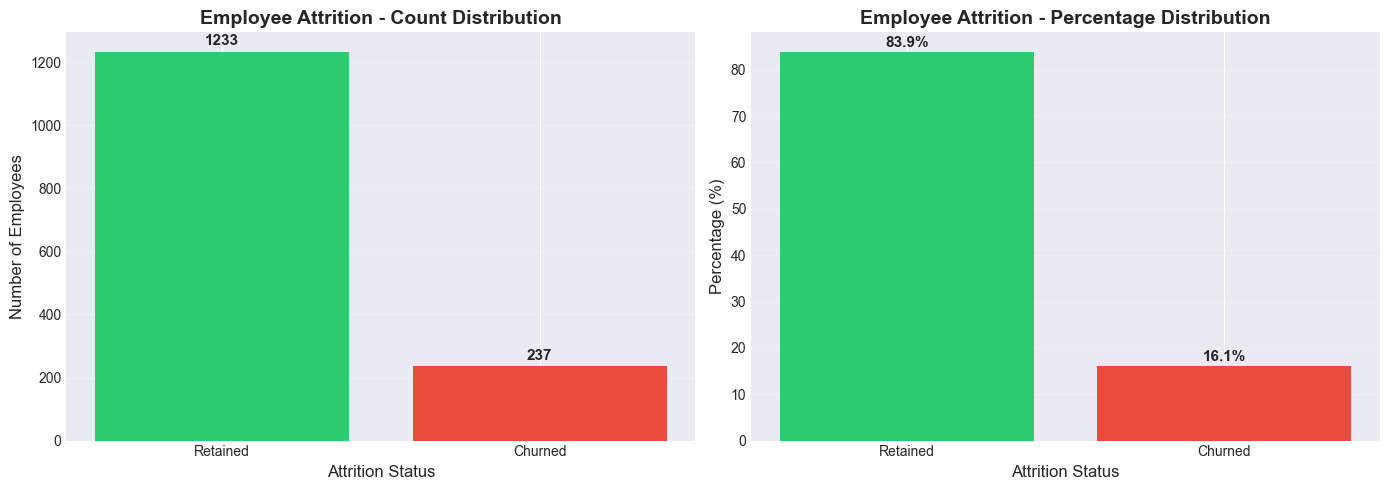


[COMMENT - PLOT 1]: The dataset shows class imbalance with 83.9% retained
employees and 16.1% churned employees. This is realistic for HR datasets
but may affect model training. We'll need to consider stratified sampling.


In [7]:
# PLOT 1: Target Variable Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
attrition_counts = df['Attrition'].value_counts()
axes[0].bar(['Retained', 'Churned'], attrition_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Employee Attrition - Count Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition Status', fontsize=12)
axes[0].set_ylabel('Number of Employees', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(attrition_counts.values):
    axes[0].text(i, v + 20, str(v), ha='center', fontsize=11, fontweight='bold')

# Percentage plot
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100
axes[1].bar(['Retained', 'Churned'], attrition_pct.values, color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Employee Attrition - Percentage Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Attrition Status', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(attrition_pct.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[COMMENT - PLOT 1]: The dataset shows class imbalance with 83.9% retained")
print("employees and 16.1% churned employees. This is realistic for HR datasets")
print("but may affect model training. We'll need to consider stratified sampling.")


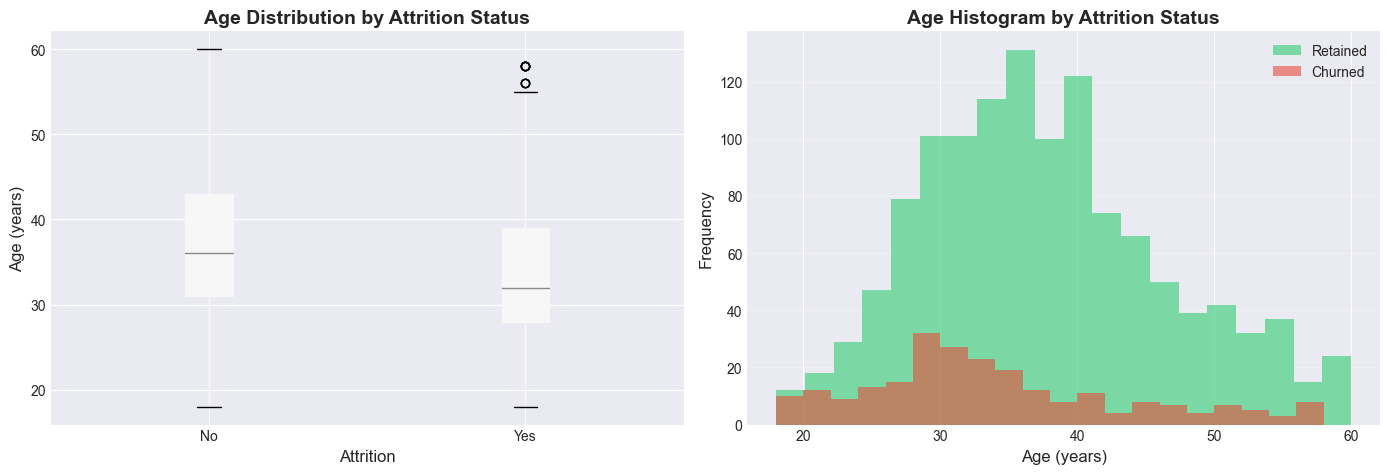


[COMMENT - PLOT 2]: Younger employees (age 25-35) show higher churn rates
Mean age of churned employees: 33.6 years
Mean age of retained employees: 37.6 years
This suggests age is an important predictor of attrition.


In [8]:
# PLOT 2: Age Distribution by Attrition
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='Age', by='Attrition', ax=axes[0], patch_artist=True)
axes[0].set_title('Age Distribution by Attrition Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition', fontsize=12)
axes[0].set_ylabel('Age (years)', fontsize=12)
plt.suptitle('')

# Histogram
retained_age = df[df['Attrition'] == 'No']['Age']
churned_age = df[df['Attrition'] == 'Yes']['Age']
axes[1].hist(retained_age, bins=20, alpha=0.6, label='Retained', color='#2ecc71')
axes[1].hist(churned_age, bins=20, alpha=0.6, label='Churned', color='#e74c3c')
axes[1].set_title('Age Histogram by Attrition Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age (years)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/02_age_vs_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[COMMENT - PLOT 2]: Younger employees (age 25-35) show higher churn rates")
print(f"Mean age of churned employees: {churned_age.mean():.1f} years")
print(f"Mean age of retained employees: {retained_age.mean():.1f} years")
print("This suggests age is an important predictor of attrition.")


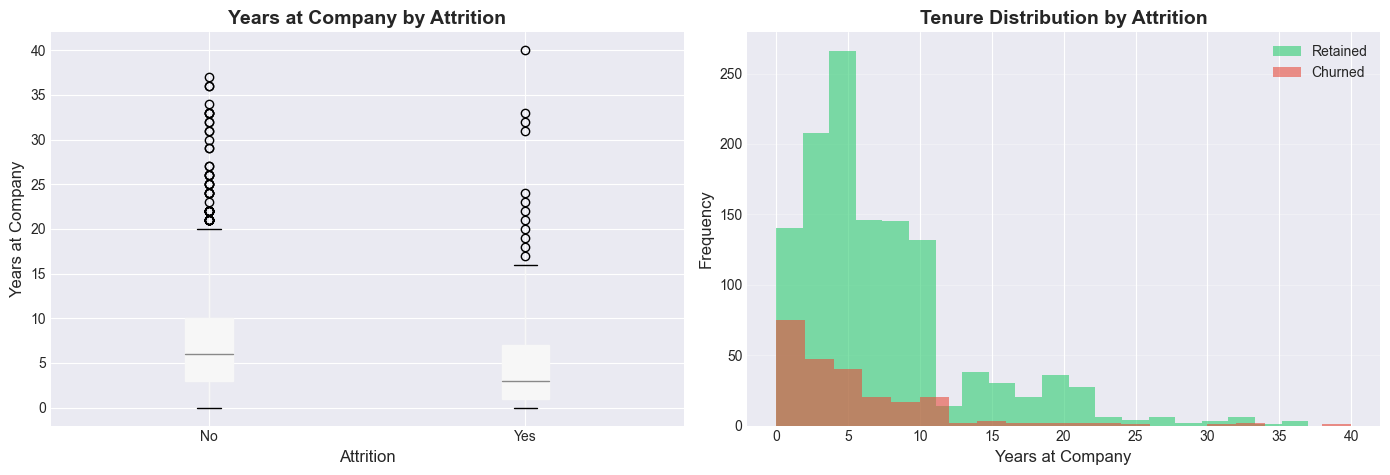


[COMMENT - PLOT 6]: Employees with shorter tenure are more likely to churn.
Mean tenure of churned employees: 5.1 years
Mean tenure of retained employees: 7.4 years
First 2 years are critical for retention strategies.


In [9]:
# PLOT 3: Years at Company vs Attrition
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='YearsAtCompany', by='Attrition', ax=axes[0], patch_artist=True)
axes[0].set_title('Years at Company by Attrition', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition', fontsize=12)
axes[0].set_ylabel('Years at Company', fontsize=12)
plt.suptitle('')

# Histogram
retained_years = df[df['Attrition'] == 'No']['YearsAtCompany']
churned_years = df[df['Attrition'] == 'Yes']['YearsAtCompany']
axes[1].hist(retained_years, bins=20, alpha=0.6, label='Retained', color='#2ecc71')
axes[1].hist(churned_years, bins=20, alpha=0.6, label='Churned', color='#e74c3c')
axes[1].set_title('Tenure Distribution by Attrition', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Years at Company', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/03_tenure_vs_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[COMMENT - PLOT 6]: Employees with shorter tenure are more likely to churn.")
print(f"Mean tenure of churned employees: {churned_years.mean():.1f} years")
print(f"Mean tenure of retained employees: {retained_years.mean():.1f} years")
print("First 2 years are critical for retention strategies.")

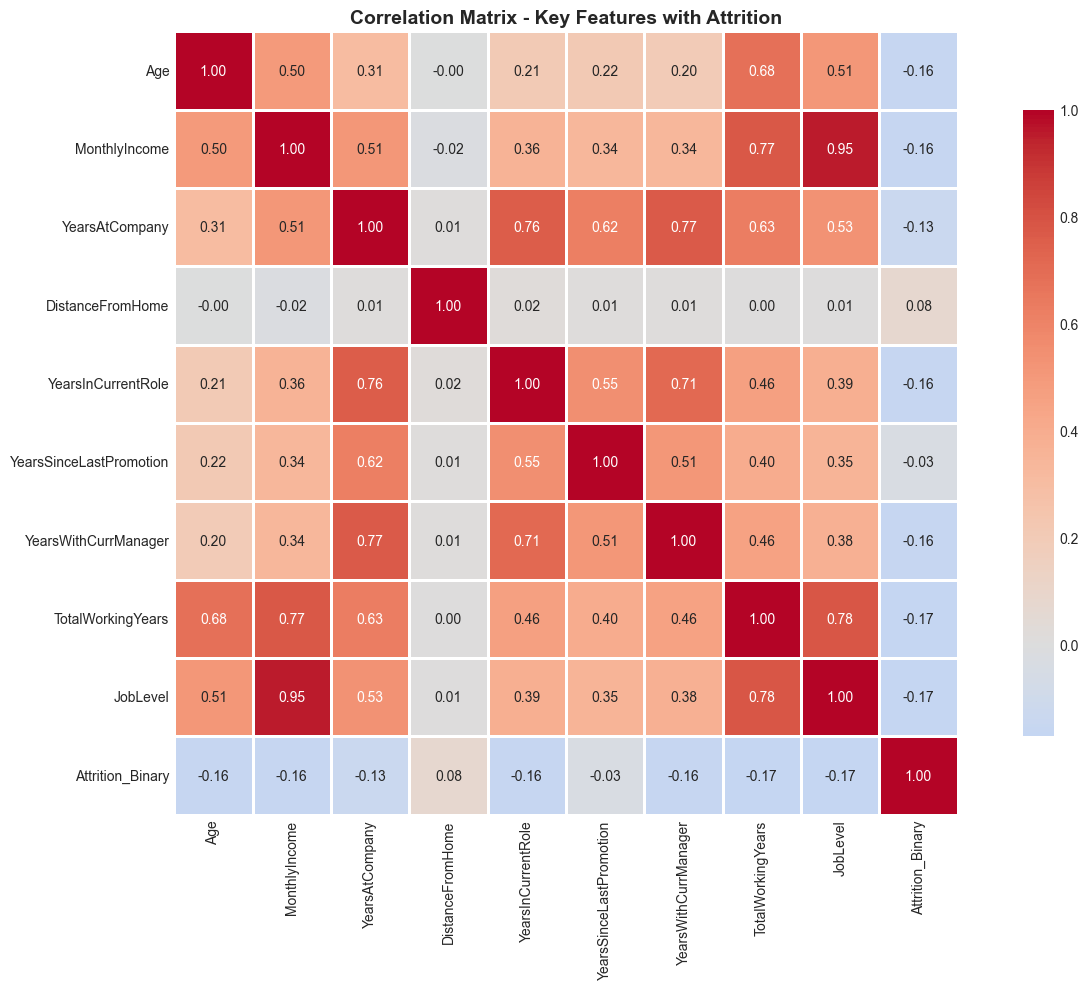


[COMMENT - PLOT 7]: Correlation with Attrition (strongest relationships):
Attrition_Binary           1.000000
DistanceFromHome           0.077924
YearsSinceLastPromotion   -0.033019
YearsAtCompany            -0.134392
YearsWithCurrManager      -0.156199
Age                       -0.159205
MonthlyIncome             -0.159840
YearsInCurrentRole        -0.160545
JobLevel                  -0.169105
TotalWorkingYears         -0.171063
Name: Attrition_Binary, dtype: float64

Key findings: YearsAtCompany, TotalWorkingYears, and JobLevel show negative
correlation with attrition, meaning longer tenure and higher positions reduce churn.


In [10]:
# PLOT 4: Correlation Heatmap
fig, ax = plt.subplots(figsize=(14, 10))

# Convert Attrition to numeric for correlation
df_numeric = df.copy()
df_numeric['Attrition_Binary'] = (df_numeric['Attrition'] == 'Yes').astype(int)

# Select numerical features
numerical_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome',
                     'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                     'TotalWorkingYears', 'JobLevel', 'Attrition_Binary']

correlation_matrix = df_numeric[numerical_features].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Key Features with Attrition', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/plots/04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Print top correlations with Attrition
attrition_corr = correlation_matrix['Attrition_Binary'].sort_values(ascending=False)
print("\n[COMMENT - PLOT 7]: Correlation with Attrition (strongest relationships):")
print(attrition_corr)
print("\nKey findings: YearsAtCompany, TotalWorkingYears, and JobLevel show negative")
print("correlation with attrition, meaning longer tenure and higher positions reduce churn.")


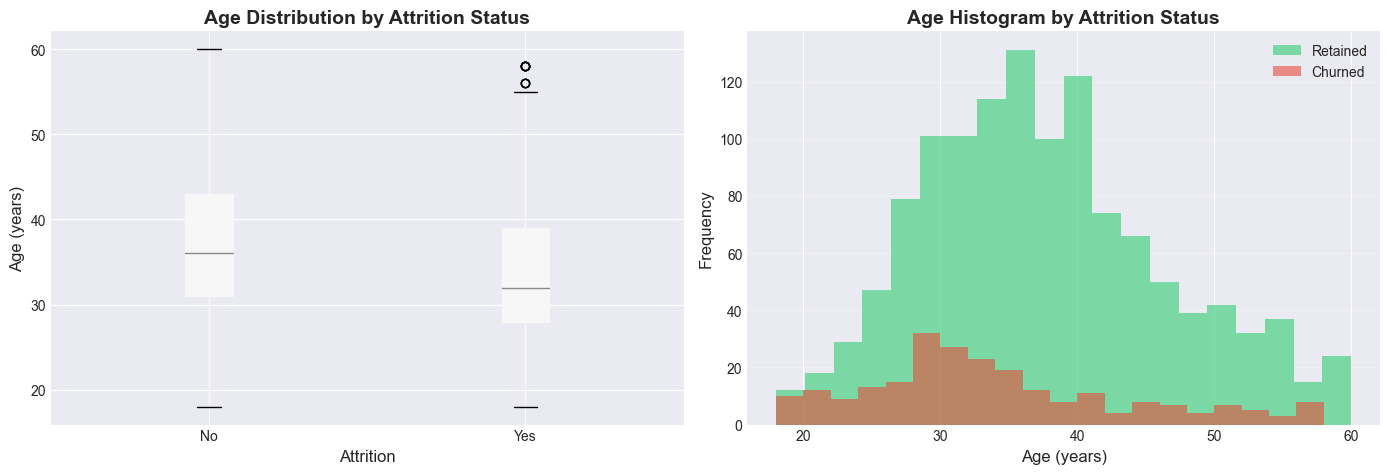


[COMMENT - PLOT 2]: Younger employees (age 25-35) show higher churn rates
Mean age of churned employees: 33.6 years
Mean age of retained employees: 37.6 years
This suggests age is an important predictor of attrition.


In [11]:
# PLOT 5: Age Distribution by Attrition
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='Age', by='Attrition', ax=axes[0], patch_artist=True)
axes[0].set_title('Age Distribution by Attrition Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition', fontsize=12)
axes[0].set_ylabel('Age (years)', fontsize=12)
plt.suptitle('')

# Histogram
retained_age = df[df['Attrition'] == 'No']['Age']
churned_age = df[df['Attrition'] == 'Yes']['Age']
axes[1].hist(retained_age, bins=20, alpha=0.6, label='Retained', color='#2ecc71')
axes[1].hist(churned_age, bins=20, alpha=0.6, label='Churned', color='#e74c3c')
axes[1].set_title('Age Histogram by Attrition Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age (years)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/05_age_vs_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[COMMENT - PLOT 2]: Younger employees (age 25-35) show higher churn rates")
print(f"Mean age of churned employees: {churned_age.mean():.1f} years")
print(f"Mean age of retained employees: {retained_age.mean():.1f} years")
print("This suggests age is an important predictor of attrition.")


#  DATA PREPARATION

In [12]:
# Convert target variable to binary
df['Attrition'] = (df['Attrition'] == 'Yes').astype(int)
print("\nTarget variable converted to binary (0=Retained, 1=Churned)")

# Remove columns with no variance or irrelevant
columns_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')
print(f"\nDropped columns: {columns_to_drop}")

# One-Hot Encoding for categorical variables
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                        'JobRole', 'MaritalStatus', 'OverTime']

df_encoded = pd.get_dummies(df_clean, columns=categorical_features, drop_first=False)
print(f"\nShape after encoding: {df_encoded.shape}")
print(f"Number of features after encoding: {df_encoded.shape[1] - 1}")

# Fix: Convert all boolean columns to int (0/1)
for col in df_encoded.columns:
    if df_encoded[col].dtype == bool:
        df_encoded[col] = df_encoded[col].astype(int)

# Remove all-zero columns (no info for tree splits)
X = df_encoded.drop('Attrition', axis=1)
X = X.loc[:, X.sum() > 0]
y = df_encoded['Attrition']

print(X.head())
print(X.describe().T)


# Define features (X) and target (y)
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget class distribution:")
print(y.value_counts())

# Save preprocessed data
X.to_csv('../data/X_features.csv', index=False)
y.to_csv('../data/y_target.csv', index=False)
print("\n✓ Preprocessed data saved to './data/' folder")
print("  - X_features.csv (features)")
print("  - y_target.csv (target)")

print("\n" + "="*70)
print("DATA EXPLORATION COMPLETE - Ready for Modeling!")
print("="*70)



Target variable converted to binary (0=Retained, 1=Churned)

Dropped columns: ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']

Shape after encoding: (1470, 52)
Number of features after encoding: 51
   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56  